1. Pada tahap awal, kita akan mempersiapkan lingkungan pemrograman dengan mengimpor library yang diperlukan.

pandas → mengelola data dalam bentuk tabel (DataFrame).

numpy → operasi numerik.

matplotlib & seaborn → visualisasi data.

In [21]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


2. Kita akan membuat dataset sederhana yang menggambarkan hubungan antara biaya iklan TV (dalam rupiah) dan penjualan produk (dalam juta rupiah).
Data ini disimulasikan secara realistis untuk mencerminkan kondisi pemasaran di dunia nyata.

In [20]:
# Membuat dataset buatan
data = {
    'Biaya_Iklan_TV (Rp)': [5_000_000, 10_000_000, 15_000_000, 20_000_000, 25_000_000, 30_000_000, 35_000_000, 40_000_000, 45_000_000, 50_000_000],
    'Penjualan (Juta Rp)': [55, 65, 80, 88, 95, 105, 120, 128, 138, 150]
}

df = pd.DataFrame(data)
df



,Biaya_Iklan_TV (Rp),Penjualan (Juta Rp)
0,5000000,55
1,10000000,65
2,15000000,80
3,20000000,88
4,25000000,95
5,30000000,105
6,35000000,120
7,40000000,128
8,45000000,138
9,50000000,150


Deskripsi Dataset:

Jumlah data: 10 baris

Variabel independen (X): Biaya iklan (dalam Rupiah)

Variabel dependen (y): Penjualan (dalam juta Rupiah)

3. Eksplorasi Data (Exploratory Data Analysis / EDA)

Tahap ini bertujuan untuk memahami struktur data, melihat beberapa baris pertama, dan menampilkan statistik dasar.
Selain itu, kita akan memvisualisasikan hubungan antara biaya iklan dan penjualan untuk melihat pola data.

In [22]:
# Melihat beberapa baris data pertama
df.head()


,Biaya_Iklan_TV (Rp),Penjualan (Juta Rp)
0,5000000,55
1,10000000,65
2,15000000,80
3,20000000,88
4,25000000,95


In [23]:
# Statistik deskriptif
df.describe()



,Biaya_Iklan_TV (Rp),Penjualan (Juta Rp)
count,1.000000e+01,10.000000
mean,2.750000e+07,102.400000
std,1.513825e+07,31.472033
min,5.000000e+06,55.000000
25%,1.625000e+07,82.000000
50%,2.750000e+07,100.000000
75%,3.875000e+07,126.000000
max,5.000000e+07,150.000000


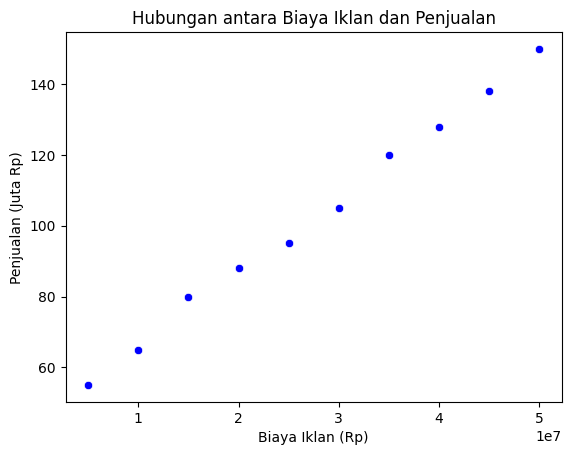

In [29]:
# Membuat visualisasi hubungan antara biaya iklan dan penjualan
sns.scatterplot(data=df, x='Biaya_Iklan_TV (Rp)', y='Penjualan (Juta Rp)', color='blue')
plt.title('Hubungan antara Biaya Iklan dan Penjualan')
plt.xlabel('Biaya Iklan (Rp)')
plt.ylabel('Penjualan (Juta Rp)')
plt.show()




Terlihat bahwa semakin tinggi biaya iklan yang dikeluarkan, penjualan juga meningkat. Artinya, terdapat hubungan positif antara kedua variabel.

4. Pembangunan Model Linear Regression

Kita akan membagi data menjadi dua bagian:

Training set (80%) → untuk melatih model.

Testing set (20%) → untuk menguji kemampuan model memprediksi data baru.

Kemudian, kita membangun model Linear Regression dari library scikit-learn dan melatihnya menggunakan data training.

In [30]:
# Menentukan variabel X (independen) dan y (dependen)
X = df[['Biaya_Iklan_TV (Rp)']]
y = df['Penjualan (Juta Rp)']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)



LinearRegression()

5. Evaluasi Model

Setelah model dilatih, kita akan menguji performanya dengan data testing:

Melihat koefisien (slope) dan intercept dari model.

Menghitung R² Score untuk menilai seberapa baik model menjelaskan variabilitas data.

Menghitung MSE (Mean Squared Error) untuk melihat seberapa besar kesalahan prediksi model.

In [31]:
# Melakukan prediksi pada data test
y_pred = model.predict(X_test)

# Menampilkan slope dan intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Koefisien (Slope): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")


Koefisien (Slope): 0.00
Intercept: 45.68


In [32]:
# Menghitung MSE dan R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")




Mean Squared Error (MSE): 1.33
R² Score: 1.00


Nilai slope positif → setiap peningkatan biaya iklan meningkatkan penjualan.

Nilai R² mendekati 1 → model memiliki tingkat akurasi tinggi.

MSE kecil → kesalahan prediksi rendah

6. Visualisasi Hasil Regresi
Deskripsi:

Tahap ini menampilkan garis regresi dan titik data aktual, agar kita bisa melihat seberapa baik garis regresi mewakili data sebenarnya.

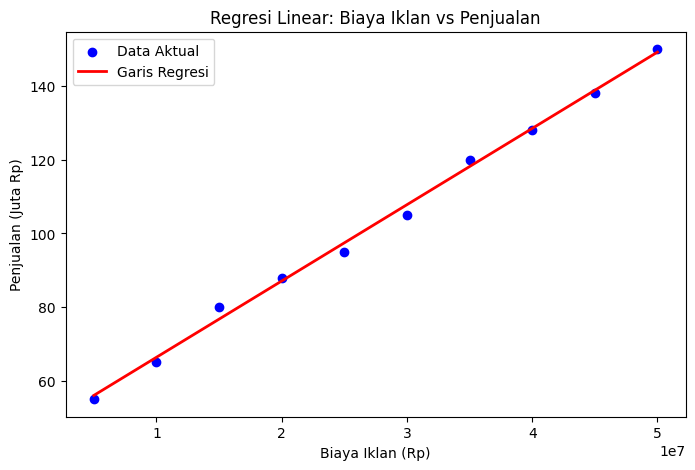

In [33]:
# Plot garis regresi dan titik data aktual
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data Aktual')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Garis Regresi')
plt.title('Regresi Linear: Biaya Iklan vs Penjualan')
plt.xlabel('Biaya Iklan (Rp)')
plt.ylabel('Penjualan (Juta Rp)')
plt.legend()
plt.show()


In [34]:
# Membandingkan nilai aktual dan prediksi
comparison = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred})
print(comparison)

   Aktual    Prediksi
8     138  138.862069
1      65   66.387931


Garis merah menunjukkan hasil prediksi model. Titik-titik biru adalah data aktual.
Jika titik-titik tersebut dekat dengan garis merah, berarti model memiliki prediksi yang baik.

7. Analisis dan Kesimpulan

📍 Interpretasi Hasil:

Slope (koefisien) ≈ menunjukkan bahwa setiap tambahan Rp1.000.000 untuk biaya iklan akan meningkatkan penjualan sebesar slope juta rupiah.

Intercept ≈ menggambarkan penjualan dasar ketika biaya iklan = Rp0.

R² Score mendekati 1 → model sangat baik dalam menjelaskan hubungan antar variabel.

📍 Evaluasi Model:

Nilai MSE yang kecil berarti error prediksi rendah.

Model tidak overfitting, karena data sederhana dan hubungan linier jelas.

📍 Kesimpulan:
Model regresi linear berhasil menggambarkan hubungan positif antara biaya iklan dan penjualan.
Artinya, semakin besar biaya iklan yang dikeluarkan (dalam Rupiah), maka penjualan produk juga cenderung meningkat.